In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow import keras
import shap
from sklearn.metrics import f1_score

In [2]:
load_path = r"C:\Users\Noaja\Downloads\msci_project\tth-ML-project\data\processed"
interim_path = r"C:\Users\Noaja\Downloads\msci_project\tth-ML-project\data\interim"
model_path =  r"C:\Users\Noaja\Downloads\msci_project\tth-ML-project\models"

event_X_train = pd.read_pickle(os.path.join(load_path, "event_X_train.pkl"))
event_X_test = pd.read_pickle(os.path.join(load_path, "event_X_test.pkl"))

y_train = pd.read_pickle(os.path.join(load_path, "y_train.pkl"))
y_test = pd.read_pickle(os.path.join(load_path, "y_test.pkl"))

object_X_train = np.load(os.path.join(load_path, "object_X_train.npy"))
object_X_test = np.load(os.path.join(load_path, "object_X_test.npy"))

X_test = pd.read_pickle(os.path.join(interim_path, "X_test.pkl"))

model_name = "model_1234_v1.h5"
model_path = os.path.join(model_path, model_name)
model = keras.models.load_model(model_path, custom_objects={"f1_score": f1_score})
preds = model.predict([event_X_test, object_X_test])

# Explain Model Results using SHAP

In [109]:
# Generate the Kernelexplainer and SHAP values
n_bg = 10
n_values = 10000

background = [event_X_train.head(n_bg).values, object_X_train[:n_bg]]
explainer = shap.GradientExplainer(model, background)
shap_values = explainer.shap_values([event_X_test.head(n_values).values, object_X_test[:n_values]])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


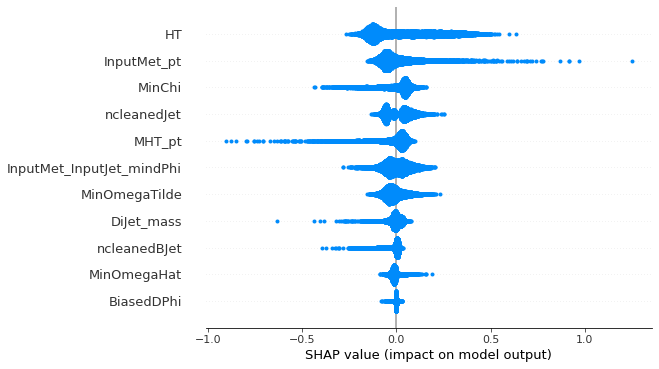

In [116]:
shap.summary_plot(shap_values[0][0], event_X_test.columns)

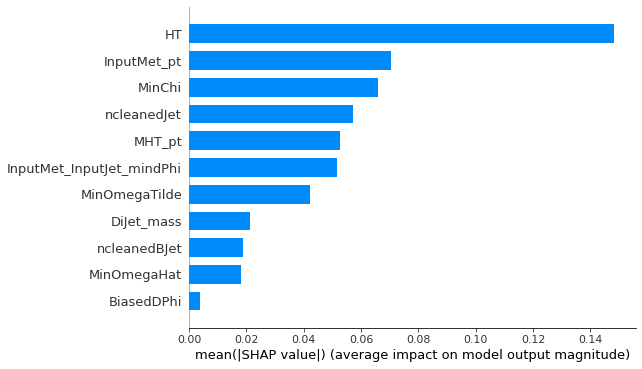

In [111]:
shap.summary_plot(shap_values[0][0], event_X_test.columns, plot_type="bar")

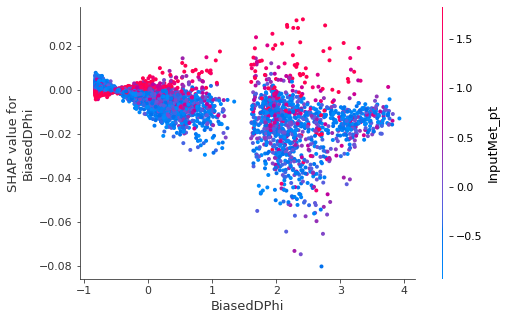

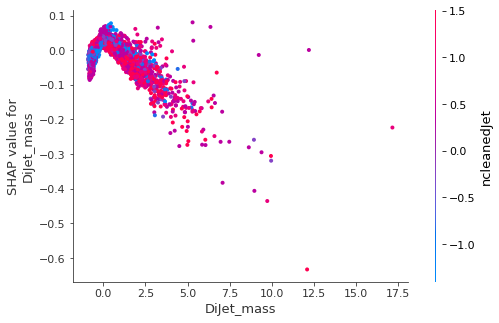

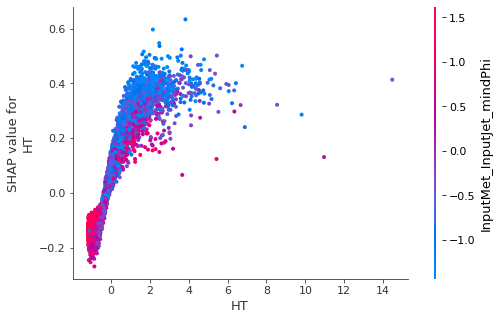

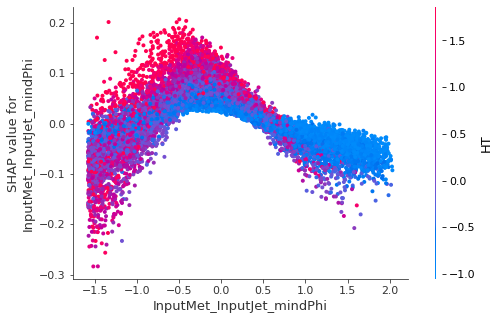

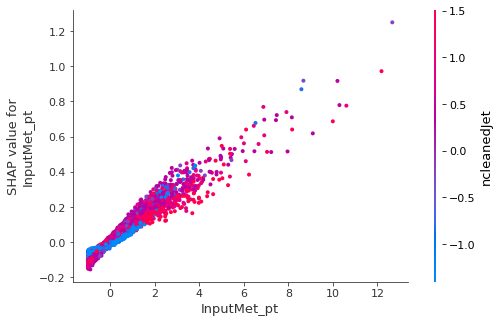

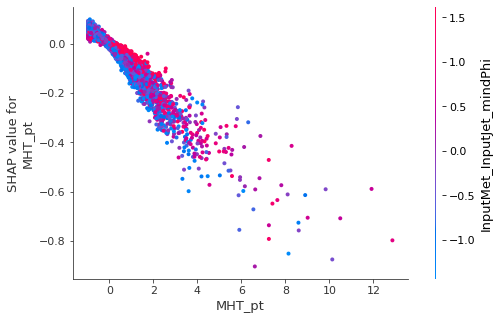

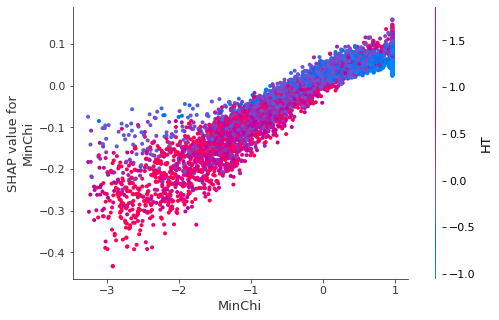

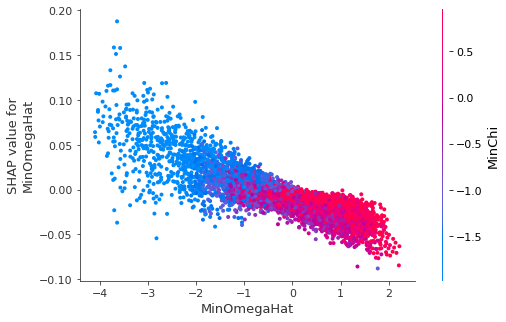

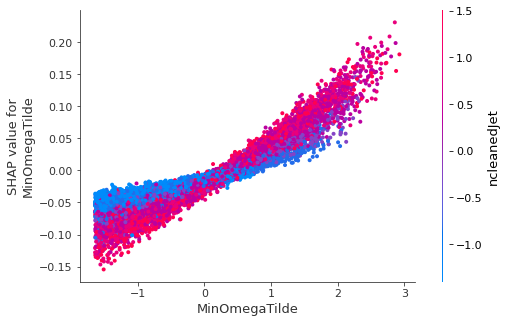

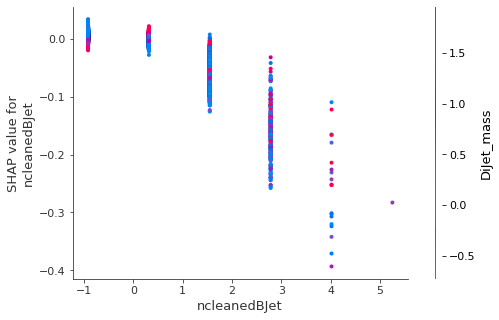

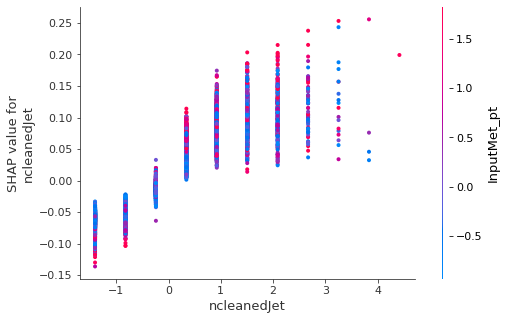

In [114]:
# Generate multiple dependence plots
for name in event_X_train.columns:
    shap.dependence_plot(name, shap_values[0][0], event_X_test.head(n_values), interaction_index='auto')